<a href="https://colab.research.google.com/github/sairamadithya/Prediction-of-Invasive-Ductal-Carcinoma-using-Biopsy-Images/blob/main/Classification_of_biopsy_of_IDC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.models import * 
from tensorflow.keras.preprocessing import image

In [2]:
!unzip '/content/archive (6).zip'

Archive:  /content/archive (6).zip
  inflating: New Dataset/test/Normal/Breast (1).png  
  inflating: New Dataset/test/Normal/Breast (10).png  
  inflating: New Dataset/test/Normal/Breast (100).png  
  inflating: New Dataset/test/Normal/Breast (101).png  
  inflating: New Dataset/test/Normal/Breast (102).png  
  inflating: New Dataset/test/Normal/Breast (103).png  
  inflating: New Dataset/test/Normal/Breast (104).png  
  inflating: New Dataset/test/Normal/Breast (105).png  
  inflating: New Dataset/test/Normal/Breast (106).png  
  inflating: New Dataset/test/Normal/Breast (107).png  
  inflating: New Dataset/test/Normal/Breast (108).png  
  inflating: New Dataset/test/Normal/Breast (109).png  
  inflating: New Dataset/test/Normal/Breast (11).png  
  inflating: New Dataset/test/Normal/Breast (110).png  
  inflating: New Dataset/test/Normal/Breast (111).png  
  inflating: New Dataset/test/Normal/Breast (112).png  
  inflating: New Dataset/test/Normal/Breast (113).png  
  inflating: New 

In [3]:
train_datagen = image.ImageDataGenerator(
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1
)
val_datagen= image.ImageDataGenerator(    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1)

In [4]:
train_generator = train_datagen.flow_from_directory(
    '/content/New Dataset/train',
    target_size = (224,224),
    batch_size = 4,
    class_mode = 'binary')
validation_generator = val_datagen.flow_from_directory(
    '/content/New Dataset/test',
    target_size = (224,224),
    batch_size = 4,
    shuffle=True,
    class_mode = 'binary')

Found 2039 images belonging to 2 classes.
Found 1065 images belonging to 2 classes.


In [5]:
base_model = tf.keras.applications.EfficientNetB3(weights='imagenet', input_shape=(224,224,3), include_top=False)

for layer in base_model.layers:
    layer.trainable=False
model = Sequential()
model.add(base_model)
model.add(GaussianNoise(0.25))
model.add(GlobalAveragePooling2D())
model.add(Dense(256,activation='relu'))
model.add(BatchNormalization())
model.add(GaussianNoise(0.25))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))
model.summary()

43941136/43941136 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional)  (None, 7, 7, 1536)       10783535  
                                                                 
 gaussian_noise (GaussianNoi  (None, 7, 7, 1536)       0         
 se)                                                             
                                                                 
 global_average_pooling2d (G  (None, 1536)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 256)               393472    
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                           

In [6]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy','AUC','Precision','Recall'])

In [7]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
es=EarlyStopping(patience=3,monitor='val_loss')
filepath='best_model.h5'
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=validation_generator,
    steps_per_epoch= 50,
    callbacks=checkpoint
    )


Epoch 1/15
50/50 [==============================] - ETA: 0s - loss: 0.6458 - accuracy: 0.7236 - auc: 0.8441 - precision: 0.4884 - recall: 0.7925
Epoch 1: val_accuracy improved from -inf to 0.87700, saving model to best_model.h5
50/50 [==============================] - 42s 444ms/step - loss: 0.6458 - accuracy: 0.7236 - auc: 0.8441 - precision: 0.4884 - recall: 0.7925 - val_loss: 0.3419 - val_accuracy: 0.8770 - val_auc: 0.8215 - val_precision: 0.5357 - val_recall: 0.3285
Epoch 2/15
50/50 [==============================] - ETA: 0s - loss: 0.5577 - accuracy: 0.7450 - auc: 0.7739 - precision: 0.5152 - recall: 0.6415
Epoch 2: val_accuracy did not improve from 0.87700
50/50 [==============================] - 17s 342ms/step - loss: 0.5577 - accuracy: 0.7450 - auc: 0.7739 - precision: 0.5152 - recall: 0.6415 - val_loss: 0.4615 - val_accuracy: 0.7859 - val_auc: 0.7911 - val_precision: 0.3202 - val_recall: 0.5912
Epoch 3/15
50/50 [==============================] - ETA: 0s - loss: 0.4091 - accurac

In [8]:
model.evaluate(train_generator)

510/510 [==============================] - 30s 59ms/step - loss: 0.1661 - accuracy: 0.9358 - auc: 0.9761 - precision: 0.8929 - recall: 0.8616


[0.16614940762519836,
 0.935752809047699,
 0.976129949092865,
 0.8929254412651062,
 0.8616236448287964]

In [10]:
model=tf.keras.models.load_model('/content/best_model.h5')
model.evaluate(validation_generator)

267/267 [==============================] - 20s 64ms/step - loss: 0.2776 - accuracy: 0.8864 - auc: 0.8707 - precision: 0.6176 - recall: 0.3066


[0.27757778763771057,
 0.8863849639892578,
 0.870732843875885,
 0.6176470518112183,
 0.30656933784484863]

1/1 [==============================] - 0s 80ms/step
[[0.7277135]]
THE UPLOADED IMAGE IS SUSPECTED AS: Invasive Ductal Carcinoma


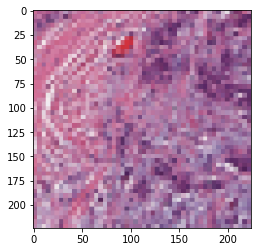

In [16]:
img = image.load_img('/content/New Dataset/test/diesease/Breast (14).png',target_size=(224,224))
imag = image.img_to_array(img)
imaga = np.expand_dims(imag,axis=0) 
ypred = model.predict(imaga)
print(ypred)
a=ypred[0]
if a>0.5:
      op="Invasive Ductal Carcinoma"
else:
      op="Normal"    
plt.imshow(img)
print("THE UPLOADED IMAGE IS SUSPECTED AS: "+str(op))  